In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import csv
import pandas as pd

In [2]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.1, 
    'gamma':0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'alpha': 0.01,
    'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

In [3]:
ion_matrix_linkou = pd.read_csv('./data/ion_matrix_linkou.csv')
ion_matrix_linkou = ion_matrix_linkou.iloc[0:, 1:]

label_linkou = pd.read_csv('./data/label_linkou.csv')
label_linkou = label_linkou.iloc[0:, 1:]

dtrain = xgb.DMatrix(data=ion_matrix_linkou, label=label_linkou['Oxacillin'])

In [4]:
model_o = xgb.train(params=params, dtrain=dtrain, num_boost_round = 120, evals=[(dtrain, 'train')])

[0]	train-auc:0.92551
[1]	train-auc:0.94492
[2]	train-auc:0.94873
[3]	train-auc:0.95500
[4]	train-auc:0.95880
[5]	train-auc:0.96261
[6]	train-auc:0.96534
[7]	train-auc:0.96760
[8]	train-auc:0.96904
[9]	train-auc:0.96997
[10]	train-auc:0.97107
[11]	train-auc:0.97213
[12]	train-auc:0.97261
[13]	train-auc:0.97300
[14]	train-auc:0.97369
[15]	train-auc:0.97396
[16]	train-auc:0.97489
[17]	train-auc:0.97554
[18]	train-auc:0.97604
[19]	train-auc:0.97651
[20]	train-auc:0.97711
[21]	train-auc:0.97761
[22]	train-auc:0.97815
[23]	train-auc:0.97887
[24]	train-auc:0.97965
[25]	train-auc:0.98007
[26]	train-auc:0.98069
[27]	train-auc:0.98104
[28]	train-auc:0.98197
[29]	train-auc:0.98260
[30]	train-auc:0.98298
[31]	train-auc:0.98340
[32]	train-auc:0.98383
[33]	train-auc:0.98415
[34]	train-auc:0.98527
[35]	train-auc:0.98572
[36]	train-auc:0.98624
[37]	train-auc:0.98680
[38]	train-auc:0.98753
[39]	train-auc:0.98776
[40]	train-auc:0.98872
[41]	train-auc:0.98940
[42]	train-auc:0.98958
[43]	train-auc:0.9900

In [5]:
ion_matrix_kaohsiung = pd.read_csv('./data/ion_matrix_kaohsiung.csv')
ion_matrix_kaohsiung = ion_matrix_kaohsiung.iloc[0:, 1:]

#print(ion_matrix_kaohsiung.head())

label_kaohsiung = pd.read_csv('./data/label_kaohsiung.csv')
label_kaohsiung = label_kaohsiung.iloc[0:, 1:]
#print(label_kaohsiung)

dtest = xgb.DMatrix(data=ion_matrix_kaohsiung)
pred_OXA = model_o.predict(dtest)

print(pred_OXA)

[0.46898338 0.00407566 0.9969627  ... 0.5835177  0.16280822 0.03945131]


In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

### roc_OXA

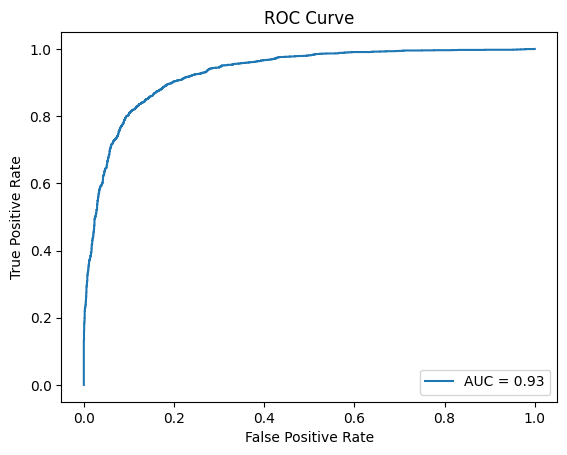

In [7]:
fpr, tpr, thresholds = roc_curve(label_kaohsiung['Oxacillin'], pred_OXA)

auc = roc_auc_score(label_kaohsiung['Oxacillin'], pred_OXA)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [8]:
dtest = xgb.DMatrix(data=ion_matrix_linkou)
pred_linkou_OXA = model_o.predict(dtest)

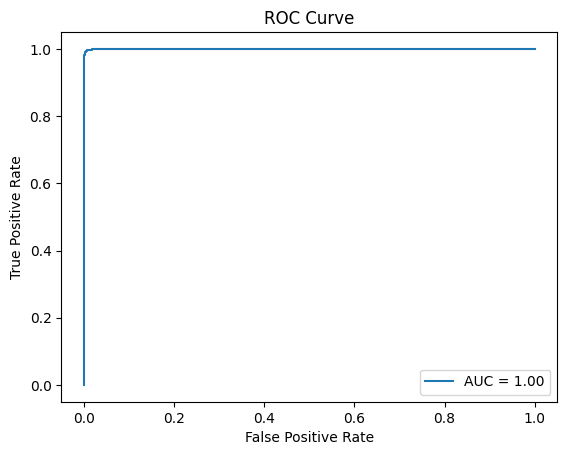

In [9]:
fpr, tpr, thresholds = roc_curve(label_linkou['Oxacillin'], pred_linkou_OXA)

auc = roc_auc_score(label_linkou['Oxacillin'], pred_linkou_OXA)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

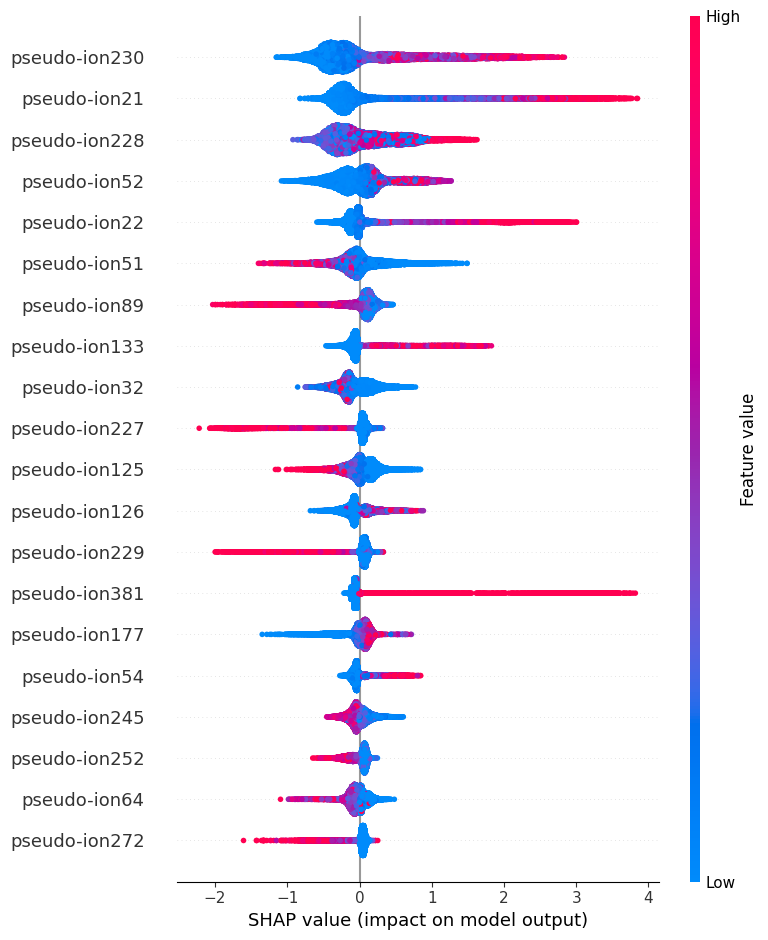

In [10]:
import shap

explainer = shap.Explainer(model_o)

shap_values = explainer(ion_matrix_linkou)

shap.summary_plot(shap_values, ion_matrix_linkou)

In [11]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.05, 
    'gamma':0,
    'max_depth': 8,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    # 'alpha': 0.01,
    # 'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

In [12]:
dtrain = xgb.DMatrix(data=ion_matrix_linkou, label=label_linkou['Clindamycin'])

In [13]:
model_cli = xgb.train(params=params, dtrain=dtrain, num_boost_round = 100, evals=[(dtrain, 'train')])

[0]	train-auc:0.88259
[1]	train-auc:0.88731
[2]	train-auc:0.89059
[3]	train-auc:0.89395
[4]	train-auc:0.89985
[5]	train-auc:0.90123
[6]	train-auc:0.90406
[7]	train-auc:0.90693
[8]	train-auc:0.90976
[9]	train-auc:0.91029
[10]	train-auc:0.91285
[11]	train-auc:0.91477
[12]	train-auc:0.91593
[13]	train-auc:0.91677
[14]	train-auc:0.91901
[15]	train-auc:0.92062
[16]	train-auc:0.92175
[17]	train-auc:0.92437
[18]	train-auc:0.92605
[19]	train-auc:0.92698
[20]	train-auc:0.92793
[21]	train-auc:0.92867
[22]	train-auc:0.92948
[23]	train-auc:0.93024
[24]	train-auc:0.93096
[25]	train-auc:0.93160
[26]	train-auc:0.93219
[27]	train-auc:0.93361
[28]	train-auc:0.93396
[29]	train-auc:0.93513
[30]	train-auc:0.93564
[31]	train-auc:0.93658
[32]	train-auc:0.93686
[33]	train-auc:0.93793
[34]	train-auc:0.93822
[35]	train-auc:0.93894
[36]	train-auc:0.93957
[37]	train-auc:0.94063
[38]	train-auc:0.94126
[39]	train-auc:0.94165
[40]	train-auc:0.94269
[41]	train-auc:0.94357
[42]	train-auc:0.94399
[43]	train-auc:0.9443

In [14]:
dtest = xgb.DMatrix(data=ion_matrix_kaohsiung)
pred_CLI = model_cli.predict(dtest)

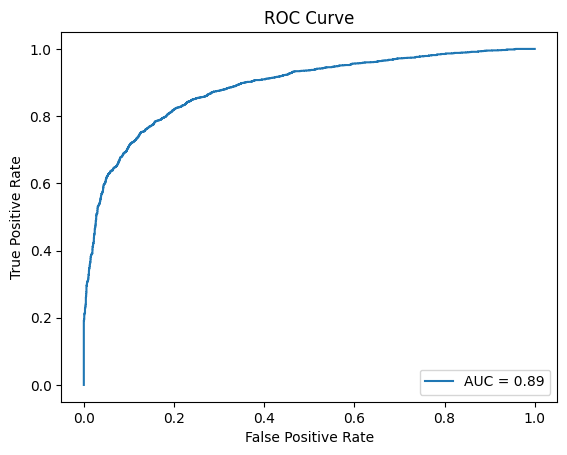

In [15]:
fpr, tpr, thresholds = roc_curve(label_kaohsiung['Clindamycin'], pred_CLI)

auc = roc_auc_score(label_kaohsiung['Clindamycin'], pred_CLI)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
dtest = xgb.DMatrix(data=ion_matrix_linkou)
pred_linkou_CLI = model_cli.predict(dtest)

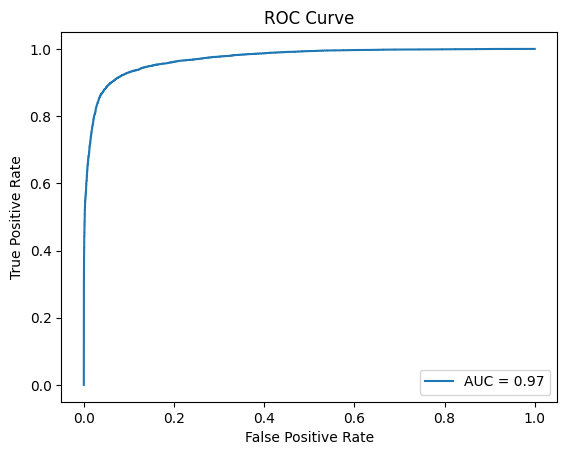

In [17]:
fpr, tpr, thresholds = roc_curve(label_linkou['Clindamycin'], pred_linkou_CLI)

auc = roc_auc_score(label_linkou['Clindamycin'], pred_linkou_CLI)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

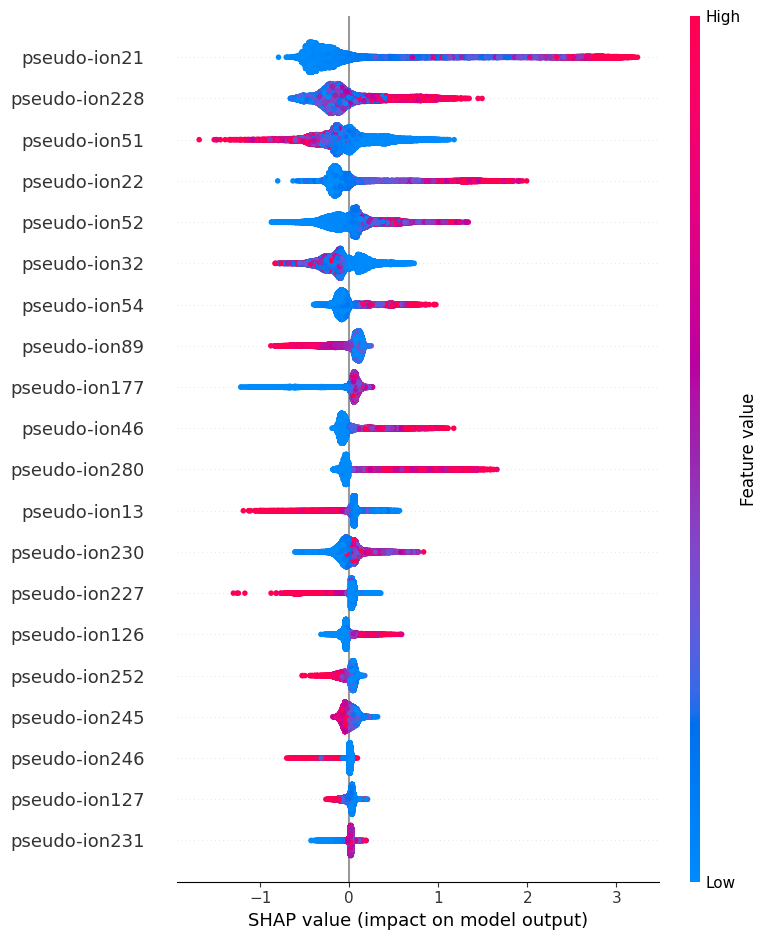

In [18]:
explainer = shap.Explainer(model_cli)

shap_values = explainer(ion_matrix_linkou)

shap.summary_plot(shap_values, ion_matrix_linkou)

In [19]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.1, 
    'gamma': 0,
    'max_depth': 8,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    # 'alpha': 0.01,
    # 'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

In [20]:
dtrain = xgb.DMatrix(data=ion_matrix_linkou, label=label_linkou['Erythromycin'])
model_ery = xgb.train(params=params, dtrain=dtrain, num_boost_round = 120, evals=[(dtrain, 'train')])

[0]	train-auc:0.86265
[1]	train-auc:0.87047
[2]	train-auc:0.88004
[3]	train-auc:0.88682
[4]	train-auc:0.88979
[5]	train-auc:0.89545
[6]	train-auc:0.90050
[7]	train-auc:0.90237
[8]	train-auc:0.90391
[9]	train-auc:0.90566
[10]	train-auc:0.90760
[11]	train-auc:0.90903
[12]	train-auc:0.91102
[13]	train-auc:0.91343
[14]	train-auc:0.91519
[15]	train-auc:0.91940
[16]	train-auc:0.92091
[17]	train-auc:0.92193
[18]	train-auc:0.92292
[19]	train-auc:0.92363
[20]	train-auc:0.92553
[21]	train-auc:0.92624
[22]	train-auc:0.92779
[23]	train-auc:0.92825
[24]	train-auc:0.92942
[25]	train-auc:0.92997
[26]	train-auc:0.93246
[27]	train-auc:0.93315
[28]	train-auc:0.93378
[29]	train-auc:0.93509
[30]	train-auc:0.93686
[31]	train-auc:0.93822
[32]	train-auc:0.93923
[33]	train-auc:0.94086
[34]	train-auc:0.94194
[35]	train-auc:0.94316
[36]	train-auc:0.94421
[37]	train-auc:0.94526
[38]	train-auc:0.94611
[39]	train-auc:0.94772
[40]	train-auc:0.94921
[41]	train-auc:0.95029
[42]	train-auc:0.95083
[43]	train-auc:0.9520

In [21]:
dtest = xgb.DMatrix(data=ion_matrix_kaohsiung)
pred_ERY = model_ery.predict(dtest)

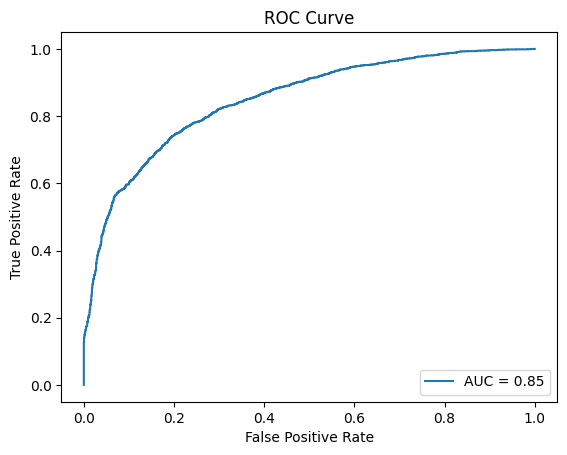

In [22]:
fpr, tpr, thresholds = roc_curve(label_kaohsiung['Erythromycin'], pred_ERY)

auc = roc_auc_score(label_kaohsiung['Erythromycin'], pred_ERY)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
dtest = xgb.DMatrix(data=ion_matrix_linkou)
pred_linkou_ERY = model_ery.predict(dtest)

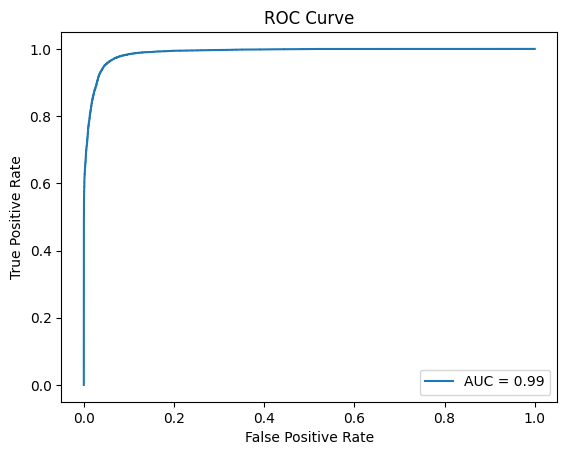

In [24]:
fpr, tpr, thresholds = roc_curve(label_linkou['Erythromycin'], pred_linkou_ERY)

auc = roc_auc_score(label_linkou['Erythromycin'], pred_linkou_ERY)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

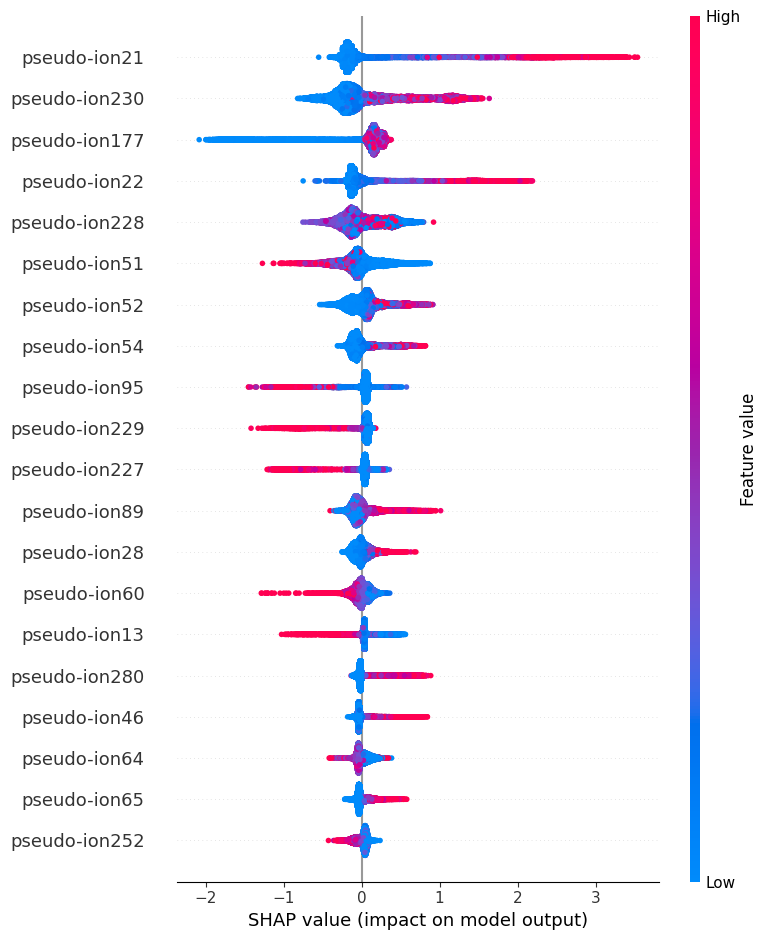

In [25]:
explainer = shap.Explainer(model_ery)

shap_values = explainer(ion_matrix_linkou)

shap.summary_plot(shap_values, ion_matrix_linkou)

In [26]:
params = {
    'booster': "gbtree",
    'objective': "binary:logistic", 
    'eta': 0.05, 
    'gamma': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'alpha': 0,
    # 'lambda':0.01,
    'eval_metric': 'auc',
    'seed': 123
    }

In [27]:
dtrain = xgb.DMatrix(data=ion_matrix_linkou, label=label_linkou['SXT'])
model_sxt = xgb.train(params=params, dtrain=dtrain, num_boost_round = 50, evals=[(dtrain, 'train')])

[0]	train-auc:0.95841
[1]	train-auc:0.96151
[2]	train-auc:0.96316
[3]	train-auc:0.96349
[4]	train-auc:0.96394
[5]	train-auc:0.96457
[6]	train-auc:0.96694
[7]	train-auc:0.96731
[8]	train-auc:0.96959
[9]	train-auc:0.97035
[10]	train-auc:0.97047
[11]	train-auc:0.97065
[12]	train-auc:0.97155
[13]	train-auc:0.97253
[14]	train-auc:0.97265
[15]	train-auc:0.97306
[16]	train-auc:0.97324
[17]	train-auc:0.97411
[18]	train-auc:0.97421
[19]	train-auc:0.97437
[20]	train-auc:0.97450
[21]	train-auc:0.97655
[22]	train-auc:0.97670
[23]	train-auc:0.97687
[24]	train-auc:0.97708
[25]	train-auc:0.97879
[26]	train-auc:0.97956
[27]	train-auc:0.97982
[28]	train-auc:0.98077
[29]	train-auc:0.98087
[30]	train-auc:0.98154
[31]	train-auc:0.98168
[32]	train-auc:0.98192
[33]	train-auc:0.98208
[34]	train-auc:0.98232
[35]	train-auc:0.98281
[36]	train-auc:0.98315
[37]	train-auc:0.98331
[38]	train-auc:0.98356
[39]	train-auc:0.98374
[40]	train-auc:0.98398
[41]	train-auc:0.98426
[42]	train-auc:0.98450
[43]	train-auc:0.9846

In [28]:
dtest = xgb.DMatrix(data=ion_matrix_kaohsiung)
pred_SXT = model_sxt.predict(dtest)

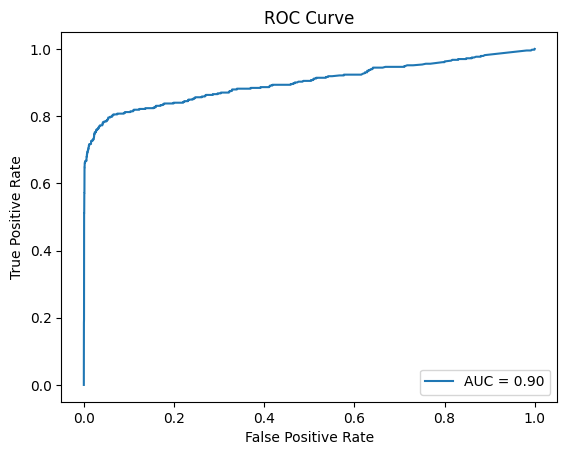

In [29]:
fpr, tpr, thresholds = roc_curve(label_kaohsiung['SXT'], pred_SXT)

auc = roc_auc_score(label_kaohsiung['SXT'], pred_SXT)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [30]:
dtest = xgb.DMatrix(data=ion_matrix_linkou)
pred_linkou_SXT = model_sxt.predict(dtest)

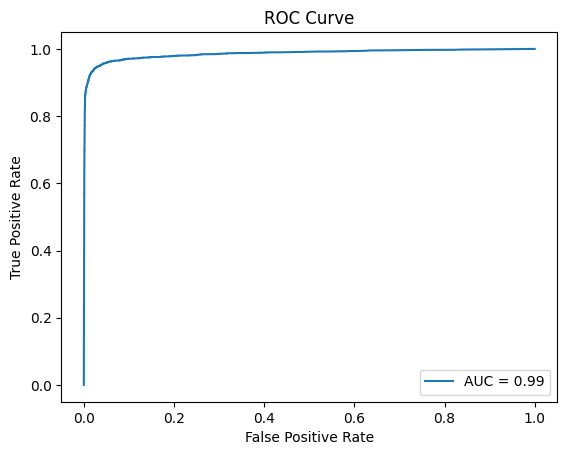

In [31]:
fpr, tpr, thresholds = roc_curve(label_linkou['SXT'], pred_linkou_SXT)

auc = roc_auc_score(label_linkou['SXT'], pred_linkou_SXT)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

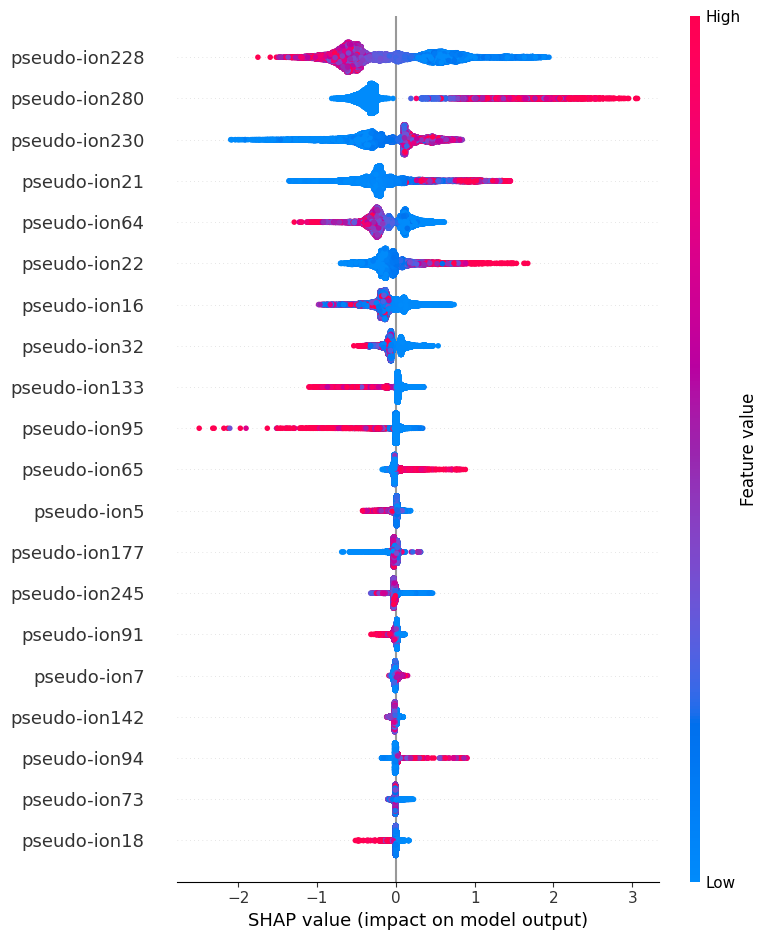

In [32]:
explainer = shap.Explainer(model_sxt)

shap_values = explainer(ion_matrix_linkou)

shap.summary_plot(shap_values, ion_matrix_linkou)

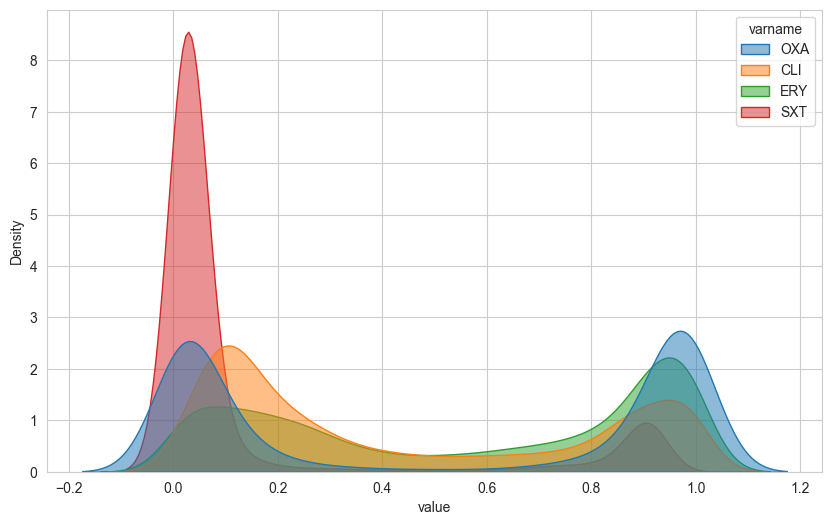

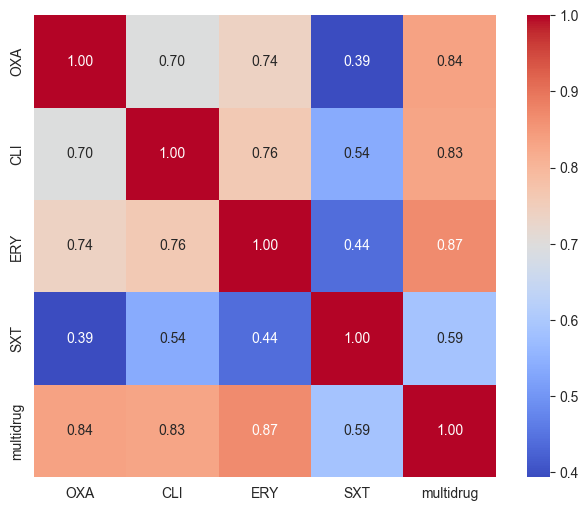

Coefficients: [1.1316179  0.8879353  1.5784718  0.90887856]
Intercept: -0.3347547
R-squared: 0.8910551245756997
(5,)
(5, 26852)
       multidrug     score
0              3  0.818367
1              0  0.077521
2              4  0.986389
3              4  0.967595
4              0  0.026890
...          ...       ...
26847          4  0.994000
26848          1  0.299457
26849          3  0.741845
26850          0  0.083584
26851          0  0.137634

[26852 rows x 2 columns]




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



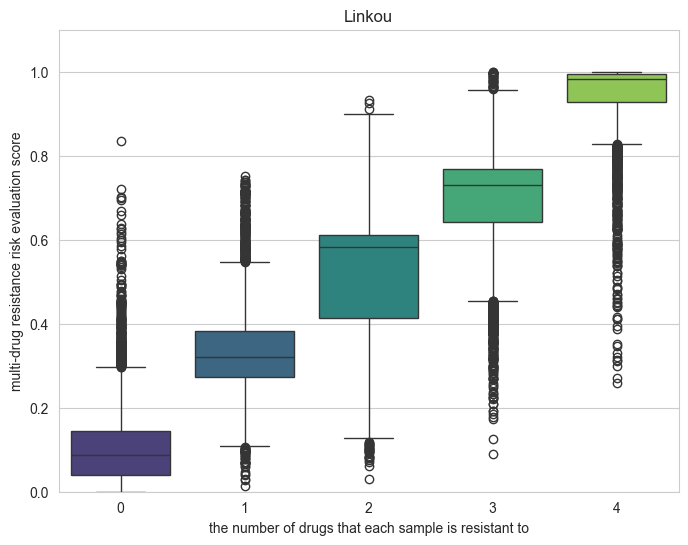



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



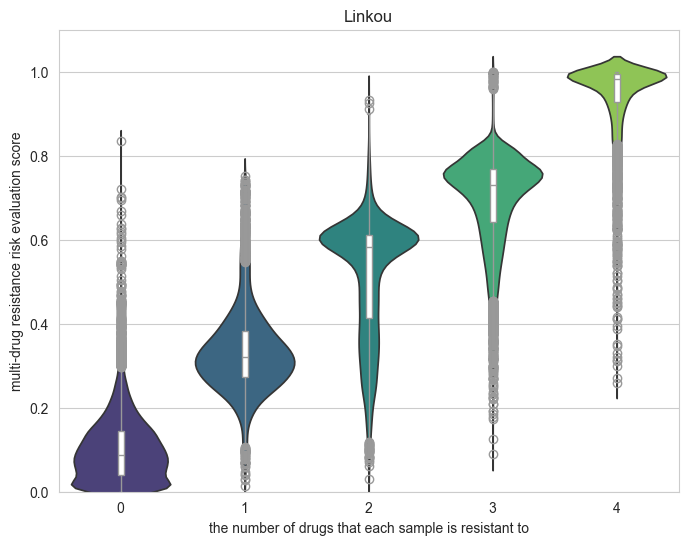

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

dtrain = xgb.DMatrix(data=ion_matrix_linkou)
pred_sxt = model_sxt.predict(dtrain)
pred_ery = model_ery.predict(dtrain)
pred_cli = model_cli.predict(dtrain)
pred_oxa = model_o.predict(dtrain)

XGBoost_predict_linkou = pd.DataFrame({'OXA': pred_oxa, 'CLI': pred_cli, 'ERY': pred_ery, 'SXT': pred_sxt, 'multidrug': label_linkou.sum(axis=1)})

# 資料整理
density_per_linkou = pd.melt(XGBoost_predict_linkou[['OXA', 'CLI', 'ERY', 'SXT']], var_name='varname', value_name='value')
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=density_per_linkou, x='value', hue='varname', fill=True, alpha=0.5, common_norm=False)
plt.show()

# 相關性分析
XGBoost_predict_linkou_subset = XGBoost_predict_linkou[['OXA', 'CLI', 'ERY', 'SXT', 'multidrug']]
XGB_pred_cor_linkou = XGBoost_predict_linkou_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(XGB_pred_cor_linkou, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.show()

# 多元線性迴歸
lm_linkou = LinearRegression().fit(XGBoost_predict_linkou_subset[['OXA', 'CLI', 'ERY', 'SXT']], XGBoost_predict_linkou_subset['multidrug'])
print("Coefficients:", lm_linkou.coef_)
print("Intercept:", lm_linkou.intercept_)
print("R-squared:", lm_linkou.score(XGBoost_predict_linkou_subset[['OXA', 'CLI', 'ERY', 'SXT']], XGBoost_predict_linkou_subset['multidrug']))

# 計算MDR score
parameter = np.concatenate(([lm_linkou.intercept_], lm_linkou.coef_))
print(parameter.shape)
print(np.vstack([np.ones(len(XGBoost_predict_linkou)), XGBoost_predict_linkou['OXA'], XGBoost_predict_linkou['CLI'], XGBoost_predict_linkou['ERY'], XGBoost_predict_linkou['SXT']]).shape)
score_linkou = np.dot(parameter, np.vstack([np.ones(len(XGBoost_predict_linkou)), XGBoost_predict_linkou['OXA'], XGBoost_predict_linkou['CLI'], XGBoost_predict_linkou['ERY'], XGBoost_predict_linkou['SXT']]))
norm_score_linkou = (score_linkou - np.min(score_linkou)) / np.ptp(score_linkou)
# 顯示箱型圖
data_boxplot_linkou_norm = pd.DataFrame({'multidrug': XGBoost_predict_linkou_subset['multidrug'], 'score': norm_score_linkou})
print(data_boxplot_linkou_norm)
plt.figure(figsize=(8, 6))
sns.boxplot(x='multidrug', y='score', data=data_boxplot_linkou_norm, palette='viridis')
plt.ylim(0, 1.1)
plt.xlabel('the number of drugs that each sample is resistant to')
plt.ylabel('multi-drug resistance risk evaluation score')
plt.title('Linkou')
plt.show()

# 顯示小提琴圖
plt.figure(figsize=(8, 6))
sns.violinplot(x='multidrug', y='score', data=data_boxplot_linkou_norm, inner=None, palette='viridis')
sns.boxplot(x='multidrug', y='score', data=data_boxplot_linkou_norm, color='white', width=0.05)
plt.ylim(0, 1.1)
plt.xlabel('the number of drugs that each sample is resistant to')
plt.ylabel('multi-drug resistance risk evaluation score')
plt.title('Linkou')
plt.show()

      multidrug     score
0             2  0.303501
1             0  0.004372
2             4  0.834988
3             2  0.658494
4             2  0.364574
...         ...       ...
4950          3  0.056073
4951          2  0.728730
4952          0  0.433800
4953          1  0.213804
4954          0  0.170343

[4955 rows x 2 columns]




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



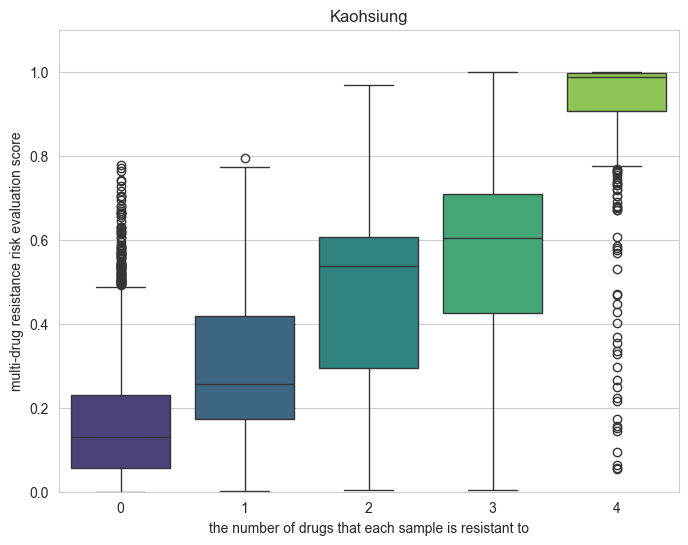



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



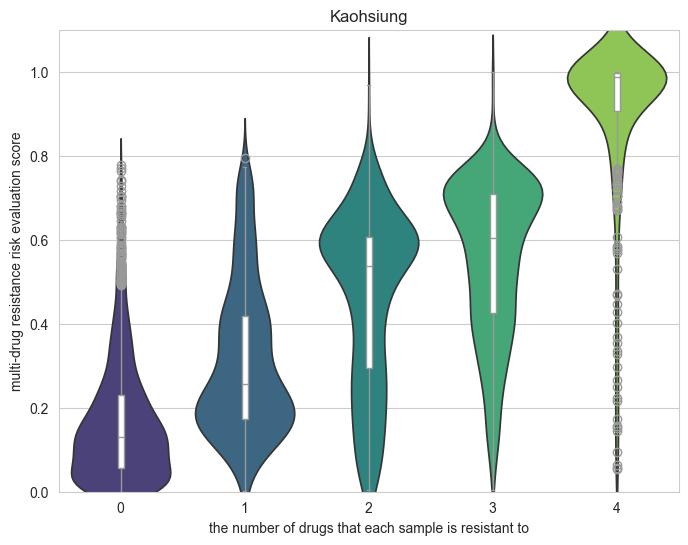

In [34]:
dtest = xgb.DMatrix(data=ion_matrix_kaohsiung)
pred_sxt = model_sxt.predict(dtest)
pred_ery = model_ery.predict(dtest)
pred_cli = model_cli.predict(dtest)
pred_oxa = model_o.predict(dtest)

XGBoost_predict_kaohsiung = pd.DataFrame({'OXA': pred_oxa, 'CLI': pred_cli, 'ERY': pred_ery, 'SXT': pred_sxt, 'multidrug': label_kaohsiung.sum(axis=1)})
XGBoost_predict_kaohsiung_subset = XGBoost_predict_kaohsiung[['OXA', 'CLI', 'ERY', 'SXT', 'multidrug']]

score_kaohsiung = np.dot(parameter, np.vstack([np.ones(len(XGBoost_predict_kaohsiung)), XGBoost_predict_kaohsiung['OXA'], XGBoost_predict_kaohsiung['CLI'], XGBoost_predict_kaohsiung['ERY'], XGBoost_predict_kaohsiung['SXT']]))
norm_score_kaohsiung = (score_kaohsiung - np.min(score_kaohsiung)) / np.ptp(score_kaohsiung)

data_boxplot_kaohsiung_norm = pd.DataFrame({'multidrug': XGBoost_predict_kaohsiung_subset['multidrug'], 'score': norm_score_kaohsiung})
print(data_boxplot_kaohsiung_norm)
plt.figure(figsize=(8, 6))
sns.boxplot(x='multidrug', y='score', data=data_boxplot_kaohsiung_norm, palette='viridis')
plt.ylim(0, 1.1)
plt.xlabel('the number of drugs that each sample is resistant to')
plt.ylabel('multi-drug resistance risk evaluation score')
plt.title('Kaohsiung')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='multidrug', y='score', data=data_boxplot_kaohsiung_norm, inner=None, palette='viridis')
sns.boxplot(x='multidrug', y='score', data=data_boxplot_kaohsiung_norm, color='white', width=0.05)
plt.ylim(0, 1.1)
plt.xlabel('the number of drugs that each sample is resistant to')
plt.ylabel('multi-drug resistance risk evaluation score')
plt.title('Kaohsiung')
plt.show()

       drug     score
0         1  0.818367
1         0  0.077521
2         1  0.986389
3         1  0.967595
4         0  0.026890
...     ...       ...
26847     1  0.994000
26848     0  0.299457
26849     1  0.741845
26850     0  0.083584
26851     0  0.137634

[26852 rows x 2 columns]
      drug     score
0      OXA  0.818367
2      OXA  0.986389
3      OXA  0.967595
7      OXA  0.771483
8      OXA  0.658711
...    ...       ...
26805  SXT  0.993742
26814  SXT  0.841377
26816  SXT  0.995017
26827  SXT  0.994756
26847  SXT  0.994000

[44360 rows x 2 columns]




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



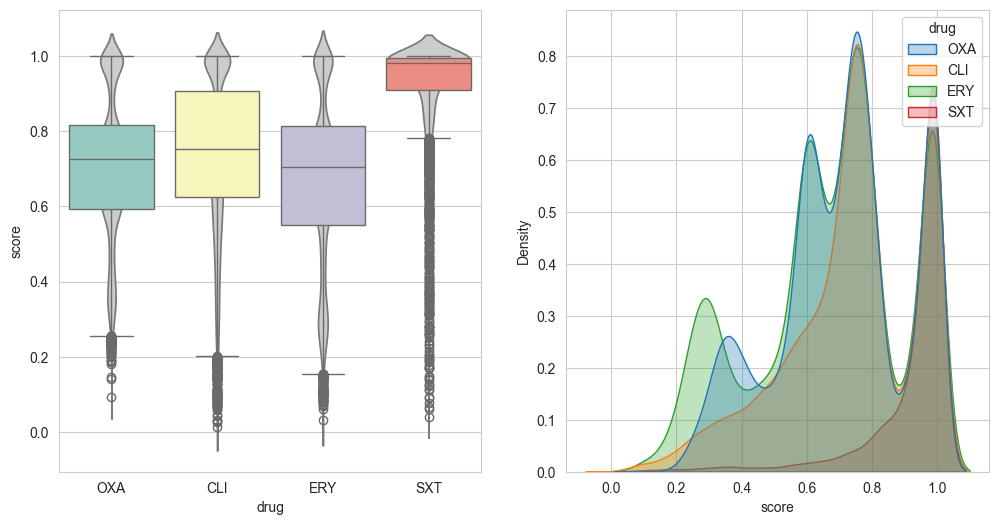

In [35]:
OXA_score = pd.DataFrame({'drug': label_linkou['Oxacillin'], 'score': norm_score_linkou})
CLI_score = pd.DataFrame({'drug': label_linkou['Clindamycin'], 'score': norm_score_linkou})
ERY_score = pd.DataFrame({'drug': label_linkou['Erythromycin'], 'score': norm_score_linkou})
SXT_score = pd.DataFrame({'drug': label_linkou['SXT'], 'score': norm_score_linkou})
print(OXA_score)
# 子集化以獲取耐藥樣本，並重新命名藥物列
OXA_R_score = OXA_score[OXA_score['drug'] == 1].copy()
OXA_R_score['drug'] = 'OXA'
CLI_R_score = CLI_score[CLI_score['drug'] == 1].copy()
CLI_R_score['drug'] = 'CLI'
ERY_R_score = ERY_score[ERY_score['drug'] == 1].copy()
ERY_R_score['drug'] = 'ERY'
SXT_R_score = SXT_score[SXT_score['drug'] == 1].copy()
SXT_R_score['drug'] = 'SXT'

# 合併為單個數據框
total_linkou = pd.concat([OXA_R_score, CLI_R_score, ERY_R_score, SXT_R_score])
print(total_linkou)

# 繪圖
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='drug', y='score', data=total_linkou, inner=None, color=".8")
sns.boxplot(x='drug', y='score', data=total_linkou, palette="Set3")
plt.subplot(1, 2, 2)
sns.kdeplot(data=total_linkou, x='score', hue='drug', fill=True, alpha=0.3)
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



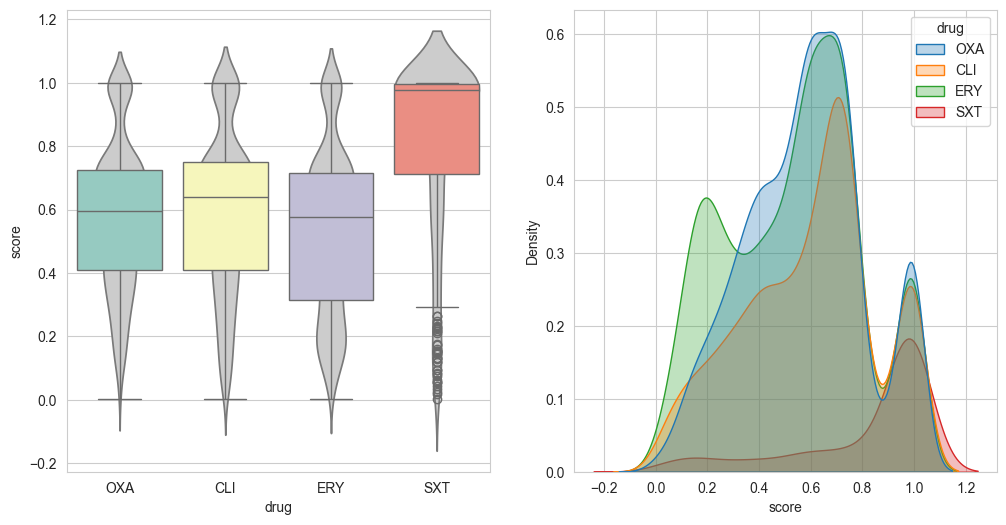

In [38]:
OXA_score = pd.DataFrame({'drug': label_kaohsiung['Oxacillin'], 'score': norm_score_kaohsiung})
CLI_score = pd.DataFrame({'drug': label_kaohsiung['Clindamycin'], 'score': norm_score_kaohsiung})
ERY_score = pd.DataFrame({'drug': label_kaohsiung['Erythromycin'], 'score': norm_score_kaohsiung})
SXT_score = pd.DataFrame({'drug': label_kaohsiung['SXT'], 'score': norm_score_kaohsiung})

# 子集化以獲取耐藥樣本，並重新命名藥物列
OXA_R_score = OXA_score[OXA_score['drug'] == 1].copy()
OXA_R_score['drug'] = 'OXA'
CLI_R_score = CLI_score[CLI_score['drug'] == 1].copy()
CLI_R_score['drug'] = 'CLI'
ERY_R_score = ERY_score[ERY_score['drug'] == 1].copy()
ERY_R_score['drug'] = 'ERY'
SXT_R_score = SXT_score[SXT_score['drug'] == 1].copy()
SXT_R_score['drug'] = 'SXT'

# 合併為單個數據框
total_kaohsiung = pd.concat([OXA_R_score, CLI_R_score, ERY_R_score, SXT_R_score])

# 繪圖
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='drug', y='score', data=total_kaohsiung, inner=None, color=".8")
sns.boxplot(x='drug', y='score', data=total_kaohsiung, palette="Set3")
plt.subplot(1, 2, 2)
sns.kdeplot(data=total_kaohsiung, x='score', hue='drug', fill=True, alpha=0.3)
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



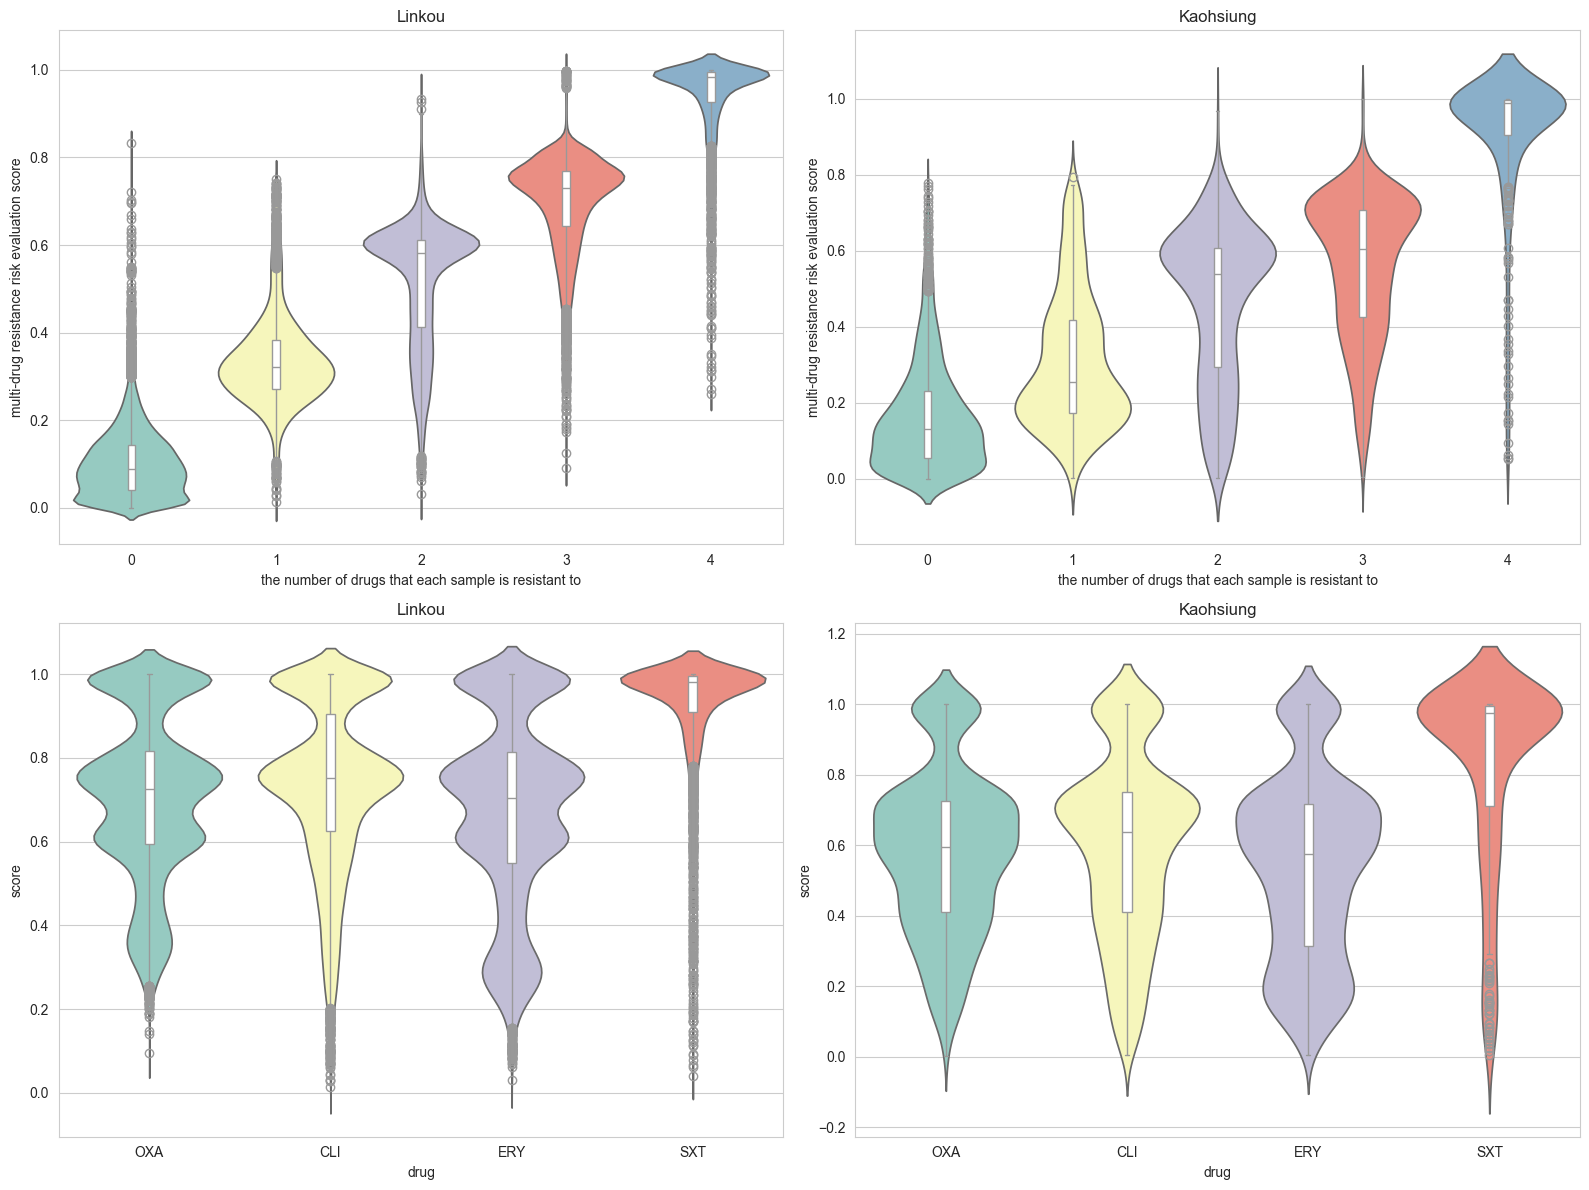

In [37]:
plt.figure(figsize=(16, 12))

# 將四個圖分別繪製在不同的子圖上
plt.subplot(2, 2, 1)
sns.violinplot(data=data_boxplot_linkou_norm, x='multidrug', y='score', inner=None, palette="Set3")
sns.boxplot(data=data_boxplot_linkou_norm, x='multidrug', y='score', color='white', width=0.05)
plt.title('Linkou')
plt.xlabel('the number of drugs that each sample is resistant to')
plt.ylabel('multi-drug resistance risk evaluation score')

plt.subplot(2, 2, 2)
sns.violinplot(data=data_boxplot_kaohsiung_norm, x='multidrug', y='score', inner=None, palette="Set3")
sns.boxplot(data=data_boxplot_kaohsiung_norm, x='multidrug', y='score', color='white', width=0.05)
plt.title('Kaohsiung')
plt.xlabel('the number of drugs that each sample is resistant to')
plt.ylabel('multi-drug resistance risk evaluation score')

plt.subplot(2, 2, 3)
sns.violinplot(data=total_linkou, x='drug', y='score', inner=None, palette="Set3")
sns.boxplot(data=total_linkou, x='drug', y='score', color='white', width=0.05)
plt.title('Linkou')
plt.xlabel('drug')
plt.ylabel('score')

plt.subplot(2, 2, 4)
sns.violinplot(data=total_kaohsiung, x='drug', y='score', inner=None, palette="Set3")
sns.boxplot(data=total_kaohsiung, x='drug', y='score', color='white', width=0.05)
plt.title('Kaohsiung')
plt.xlabel('drug')
plt.ylabel('score')

plt.tight_layout()
plt.show()